In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os, sys
os.chdir('/content/drive/MyDrive/lock_exchange')

Mounted at /content/drive/


In [ ]:
# import meshio
import numpy as np
from scipy import stats
import os, sys
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# from scipy.interpolate import interp1d
from scipy.interpolate import griddata
import time

from copy import deepcopy as cp
from sklearn.linear_model import Lasso
from scipy.integrate import solve_ivp
from math import sqrt
from joblib import Parallel, delayed

from copy import deepcopy as cp
import numpy as np
from sklearn.decomposition import PCA

import pandas as pd
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Lambda, Add, Reshape
from keras.models import Model
from keras.callbacks import ModelCheckpoint,EarlyStopping
from sklearn.model_selection import train_test_split
from tqdm import tqdm as tqdm
import os, sys
import urllib.request

from autoencoder import *

In [ ]:
sys.path.append('/content/drive/MyDrive/lock_exchange/scr/')
from utils_plot import *  # contour
from utils_sindy import *
from loops import *
from process import *
from autoencoder import *

# lock_exchange


## 1 Load data

In [ ]:
store_path = '/content/drive/MyDrive/lock_exchange/new data/'
temperature = np.load(os.path.join(store_path, "temperature_816.npy"), mmap_mode='r')
coordinates = np.load(os.path.join(store_path, "coordinates.npy"), mmap_mode='r')

In [ ]:
print(temperature.shape)
print(coordinates.shape)
print("x.range:",np.min(coordinates[:,0]),np.max(coordinates[:,0]))
print("y.range:",np.min(coordinates[:,1]),np.max(coordinates[:,1]))

(601, 1491)
(1491, 2)
x.range: 0.0 0.8
y.range: 0.0 0.1


### contour

[0.8, 0.0, 0.1, 0.0]


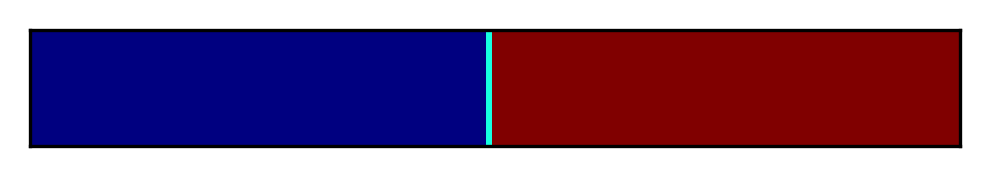

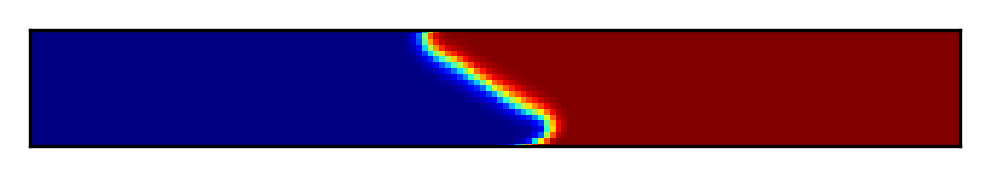

In [ ]:

[xmin, ymin] = np.min(coordinates, axis=0)
[xmax, ymax] = np.max(coordinates, axis=0)
# xmin, xmax = 1.5, 18.0
# ymin, ymax = -3.5, 3.5
limit = [xmax,xmin,ymax,ymin]
print(limit)
value = temperature[200,:]

grid_contour(temperature[0,:],coordinates,limit,'jet',None,30,0)
grid_contour(temperature[100,:],coordinates,limit,'jet',None,30,0)
# grid_contour(temperature[200,:],coordinates,limit,'jet',None,30,0)
# grid_contour(temperature[300,:],coordinates,limit,'jet',None,30,0)
# grid_contour(temperature[400,:],coordinates,limit,'jet',None,30,0)
# grid_contour(temperature[500,:],coordinates,limit,'jet',None,30,0)
# grid_contour(temperature[599,:],coordinates,limit,'jet',None,30,0)
# grid_contour(velocity[2040,:,0],coordinates,limit,'jet',None,30,3)
# grid_contour(velocity[2080,:,0],coordinates,limit,'jet',None,30,3)
# grid_contour(velocity[2120,:,0],coordinates,limit,'jet',None,30,3)
# grid_contour(velocity[2160,:,0],coordinates,limit,'jet',None,30,3)

In [ ]:
print(coordinates.shape)
coordi = cp(coordinates)
x0 = 0.5
y0 = 0.05
coor_diff = np.zeros((len(coordi),))
for i in range(len(coor_diff)):
  coor_diff[i] = np.sqrt((coordi[i,0]-x0)**2+(coordi[i,1]-y0)**2)
print(np.min(coor_diff))
print(np.argmin(coor_diff))
# print(coordinates[460,:])

(1491, 2)
0.0040000000000000036
866


In [ ]:
print(coordinates.shape)
coordi = cp(coordinates)
x0 = 0.7
y0 = 0.05
coor_diff = np.zeros((len(coordi),))
for i in range(len(coor_diff)):
  coor_diff[i] = np.sqrt((coordi[i,0]-x0)**2+(coordi[i,1]-y0)**2)
print(np.min(coor_diff))
print(np.argmin(coor_diff))
# print(coordinates[460,:])

(1491, 2)
1.3150596413146891e-13
1405


In [ ]:
print(coordinates[1200,:])

[0.424 0.085]


In [ ]:
[xmin, ymin] = np.min(coordinates, axis=0)
[xmax, ymax] = np.max(coordinates, axis=0)
# xmin, xmax = 1.0, 11.0
# ymin, ymax = -2.5, 2.5
limit = [xmax,xmin,ymax,ymin]

coordinates_orig = coordinates
value = temperature[0,:]

cmp = 'jet'
vml = None
fs1 = 30
cylinder_num = 0

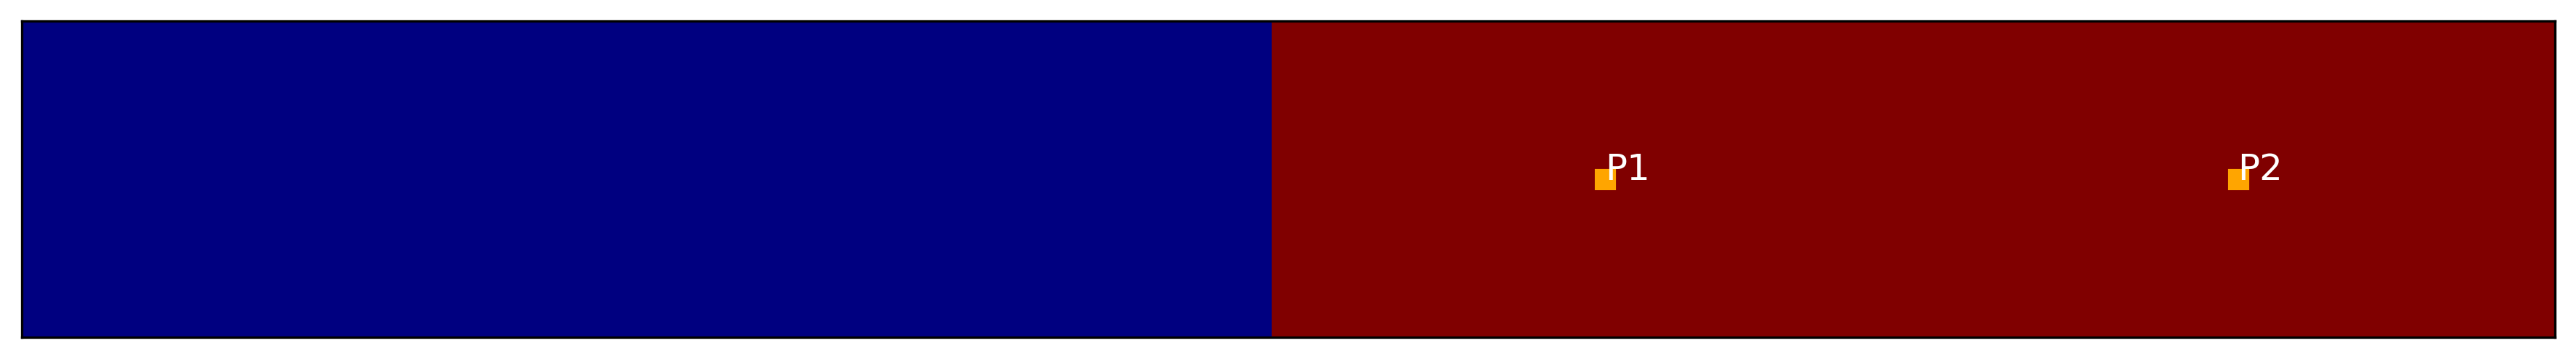

In [ ]:
xmax,xmin,ymax,ymin=limit[0],limit[1],limit[2],limit[3]

# 插值后的坐标
dx, dy = 0.01, 0.01
# dx, dy = 0.01, 0.01
Nx = int((xmax-xmin)/dx+1)
Ny = int((ymax-ymin)/dy+1)
x = np.linspace(xmin, xmax, Nx)
y = np.linspace(ymin, ymax, Ny)
x_mesh, y_mesh = np.meshgrid(x, y)

# 插值
grid1 = griddata(coordinates,value,(x_mesh,y_mesh), method='linear', fill_value=0)

# 绘图
ddx = 0.5*(x[2]-x[1])
xca = np.linspace(x[0]-ddx, x[len(x)-1]+ddx, len(x)+1)
ddy = 0.5*(y[2]-y[1])
yca = np.linspace(y[0]-ddy, y[len(y)-1]+ddy, len(y)+1)
# vim = [-0.2,1.4]

# 创造画布
fit = plt.figure(dpi=300,figsize=(15,4))
ax = plt.axes()
# 坐标轴设置
plt.gca().set_aspect('equal')
plt.axis([xmin,xmax,ymin,ymax])
plt.xticks([])
plt.yticks([])
# cmp参数设置
if cmp==None:
  cmp='viridis'  # 'jet'?
# 颜色范围设置
if vml==None:
  plt.pcolor(xca,yca,grid1[:,:],cmap=cmp)
else:
  plt.pcolor(xca,yca,grid1[:,:],cmap=cmp,vmin=vml[0],vmax=vml[1])
plt.xticks(fontsize=fs1-5); plt.yticks(fontsize=fs1-5)  # 【？】
if cylinder_num==1:
  # 画黑色的圆边界
  cx1=np.linspace(8.5,9.5,100)
  cy1=np.sqrt(0.25-(cx1-9)**2)
  cx2=np.linspace(9.5,8.5,100)
  cy2=-np.sqrt(0.25-(cx1-9)**2)
  circx=np.concatenate([cx1,cx2])
  circy=np.concatenate([cy1,cy2])
  plt.plot(circx,circy,color='black',linewidth=1)
  # 在圆部分填充灰色
  c = patches.Circle(xy=(9, 0), radius=0.5, fc='grey', ec='k')
  ax.add_patch(c)
elif cylinder_num==3:
  # 加圆柱
  r=0.5
  # 第一个圆
  rx, ry = 4.23, 0.8
  cx11=np.linspace(rx-r,rx+r,100)
  cy11=np.sqrt(r*r-(cx11-rx)**2)+ry
  cx12=np.linspace(rx+r,rx-r,100)
  cy12=-np.sqrt(r*r-(cx12-rx)**2)+ry
  circx=np.concatenate([cx11,cx12])
  circy=np.concatenate([cy11,cy12])
  plt.plot(circx,circy,color='black',linewidth=1)
  c1 = patches.Circle(xy=(rx, ry), radius=r, fc='grey', ec='k')
  ax.add_patch(c1)
  # 第二个圆
  rx, ry = 4.23, -0.8
  cx21=np.linspace(rx-r,rx+r,100)
  cy21=np.sqrt(r*r-(cx21-rx)**2)+ry
  cx22=np.linspace(rx+r,rx-r,100)
  cy22=-np.sqrt(r*r-(cx22-rx)**2)+ry
  circx=np.concatenate([cx21,cx22])
  circy=np.concatenate([cy21,cy22])
  plt.plot(circx,circy,color='black',linewidth=1)
  c2 = patches.Circle(xy=(rx, ry), radius=r, fc='grey', ec='k')
  ax.add_patch(c2)
  # 第三个圆
  rx, ry = 3.0, 0.0
  cx31=np.linspace(rx-r,rx+r,100)
  cy31=np.sqrt(r*r-(cx31-rx)**2)+ry
  cx32=np.linspace(rx+r,rx-r,100)
  cy32=-np.sqrt(r*r-(cx32-rx)**2)+ry
  circx=np.concatenate([cx31,cx32])
  circy=np.concatenate([cy31,cy32])
  plt.plot(circx,circy,color='black',linewidth=1)
  c3 = patches.Circle(xy=(rx, ry), radius=r, fc='grey', ec='k')
  ax.add_patch(c3)
elif cylinder_num==2:
  # 加圆柱
  r=0.1
  # 第一个圆
  rx, ry = 1.7, 1.0
  cx11=np.linspace(rx-r,rx+r,100)
  cy11=np.sqrt(r*r-(cx11-rx)**2)+ry
  cx12=np.linspace(rx+r,rx-r,100)
  cy12=-np.sqrt(r*r-(cx12-rx)**2)+ry
  circx=np.concatenate([cx11,cx12])
  circy=np.concatenate([cy11,cy12])
  plt.plot(circx,circy,color='black',linewidth=1)
  c1 = patches.Circle(xy=(rx, ry), radius=r, fc='grey', ec='k')
  ax.add_patch(c1)
  # 第二个圆
  rx, ry = 2.3, 1.0
  cx21=np.linspace(rx-r,rx+r,100)
  cy21=np.sqrt(r*r-(cx21-rx)**2)+ry
  cx22=np.linspace(rx+r,rx-r,100)
  cy22=-np.sqrt(r*r-(cx22-rx)**2)+ry
  circx=np.concatenate([cx21,cx22])
  circy=np.concatenate([cy21,cy22])
  plt.plot(circx,circy,color='black',linewidth=1)
  c2 = patches.Circle(xy=(rx, ry), radius=r, fc='grey', ec='k')
  ax.add_patch(c2)
# plt.plot([1025,1025],[-2,2],'k',lw=0.5)
# plt.plot([1.6,1.6],[-3,3],'k',lw=0.5)
# plt.plot([1.89895505], [1.00459325], marker='s')
plt.plot([0.5], [0.05], marker='s',color='orange')
plt.text(0.5, 0.05, 'P1',fontsize=12, color='white',weight='light')
plt.plot([0.7], [0.05], marker='s',color='orange')
plt.text(0.7, 0.05, 'P2',fontsize=12, color='white',weight='light')
# [0.424 0.085]
plt.show()

## 2 ROM-POD

### 2.1 POD



In [ ]:
from copy import deepcopy as cp
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
print(temperature.shape)

In [ ]:
n_ts = 601
num_point = 1491
X = temperature[0:n_ts,:]
Xrall = np.zeros_like(X)
print('X',X.shape)

X_avg = np.mean(X,axis=0)
for i in range(len(Xrall)):
  Xrall[i,:] = X[i,:] - X_avg

X (601, 1491)


In [ ]:
kk = 10
ratio_nomode0 = np.zeros((10,2))
ratio_mode0 = np.zeros((10,2))
for k in range(kk):
# k = 5 # POD latent vector
  print("k=",k)
  Xr = cp(Xrall)
  Xr = Xr.reshape((len(Xrall),num_point))
  ratio_nomode0[k,0] = k
  ratio_mode0[k,0] = k

  pca1 = PCA(n_components=k)
  Xr_reduce = pca1.fit_transform(Xr)

  # print(Xr_reduce.shape)  # (ts,new_fea)
  # print(pca1.explained_variance_)
  # print(pca1.explained_variance_ratio_)

  sum = 0
  for i in range(0,len(pca1.explained_variance_ratio_)):
    sum += pca1.explained_variance_ratio_[i]
  # print(sum)

  comp = pca1.components_
  # print(comp.shape)  # Pk
  re_Xr_pca = np.dot(Xr_reduce,comp)
  # print(re_Xr_pca.shape)


  Xr = Xr.reshape((len(Xr),num_point))
  re_Xr_pca = re_Xr_pca.reshape((len(Xr_reduce),num_point))
  ratio = 1-np.linalg.norm(re_Xr_pca-Xr)/np.linalg.norm(Xr)
  ratio_nomode0[k,1] = ratio

  re_Xr = np.zeros_like(re_Xr_pca)
  for i in range(len(re_Xr)):
    re_Xr[i,:] = re_Xr_pca[i,:] + X_avg
  ratio = 1-np.linalg.norm(re_Xr-X)/np.linalg.norm(X)
  ratio_mode0[k,1] = ratio

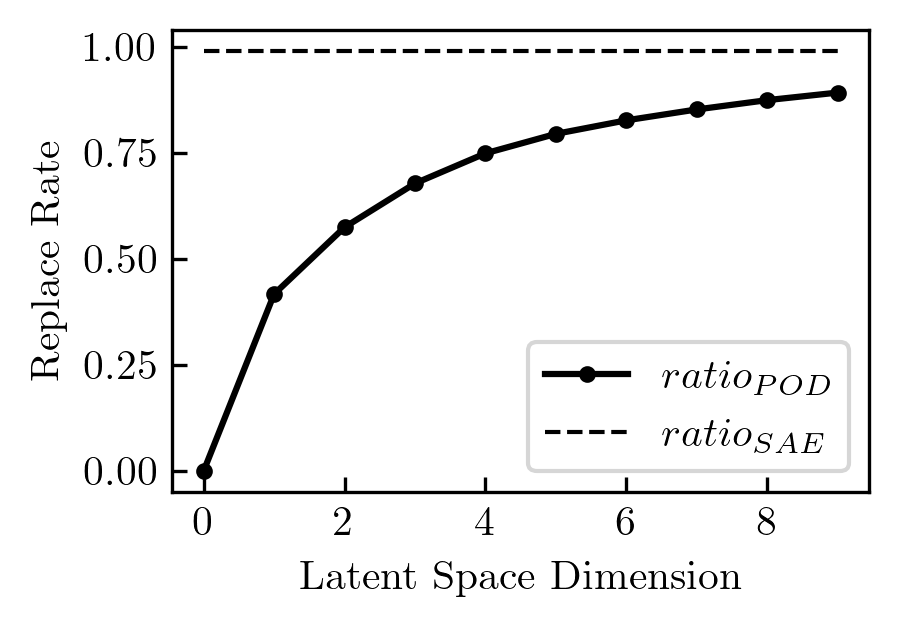

In [ ]:
k_dim = np.arange(kk)
plt.figure(dpi=300,figsize=(3,2))
# plt.scatter(k_dim,ratio_mode0,marker='o', c=totalnum[noerror], cmap='tab20', label='Amplitude',vmin=-0.5, vmax=19.5)
# plt.scatter(k_dim, ratio_mode0[:,1], marker='o', cmap='tab20', label='ratio(POD,no mode0)',vmin=-0.5, vmax=19.5)
plt.plot(k_dim, ratio_nomode0[:,1],'k.-',label=r'$ratio_{POD}$')
# plt.plot(k_dim, ratio_mode0[:,1],'.-',label=r'$ratio2_{POD}$')
# plt.plot(alr_ne, err_st, 'k.-',label='Frequency')
plt.ylabel('Replace Rate')
plt.xlabel('Latent Space Dimension')
# plt.ylabel('Error rate', fontsize=fonts1)
# plt.xlabel(r'$\alpha$', fontsize=fonts1)
# plt.xscale('log')
x0 = 9
y0 = 0.9895622202309047  # SAE二维还原率
y1 = 0.9890809800569939
plt.plot([0,x0],[y0,y0],'k--',lw=1,label=r'$ratio_{SAE}$')
# plt.plot([0,x0],[y1,y1],'b--',lw=0.5,label=r'$ratio2_{SAE}$')

plt.legend(loc='lower right')

# filename = "/content/drive/MyDrive/fig/lock_exchange/replace_rate_comparison.png"
# plt.savefig(filename,bbox_inches='tight')


In [ ]:
k = 4 # POD latent vector

Xr = cp(Xrall)
Xr = Xr.reshape((len(Xrall),num_point))

pca1 = PCA(n_components=k)
Xr_reduce = pca1.fit_transform(Xr)

print(Xr_reduce.shape)  # (ts,new_fea)
print(pca1.explained_variance_)
print(pca1.explained_variance_ratio_)

sum = 0
for i in range(0,len(pca1.explained_variance_ratio_)):
  sum += pca1.explained_variance_ratio_[i]
print(sum)

(601, 4)
[64.54501344 15.54337691  7.56609723  3.97927525]
[0.65977445 0.15888327 0.0773401  0.04067586]
0.9366736861605605


#### 查看POD还原图像的准确率

In [ ]:
comp = pca1.components_
print(comp.shape)  # Pk
re_Xr_pca = np.dot(Xr_reduce,comp)
# print(re_Xr_pca.shape)

Xr = Xr.reshape((len(Xr),num_point))
re_Xr_pca = re_Xr_pca.reshape((len(Xr_reduce),num_point))
ratio = 1-np.linalg.norm(re_Xr_pca-Xr)/np.linalg.norm(Xr)

re_Xr = np.zeros_like(re_Xr_pca)
for i in range(len(re_Xr)):
  re_Xr[i,:] = re_Xr_pca[i,:] + X_avg
ratio = 1-np.linalg.norm(re_Xr-X)/np.linalg.norm(X)

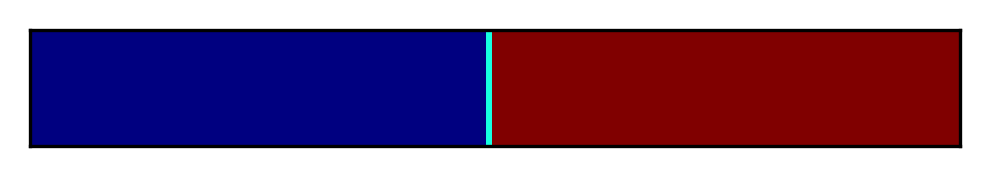

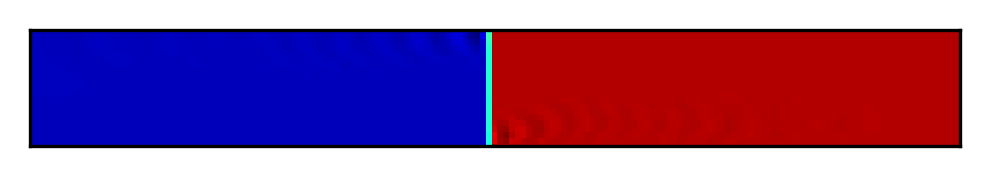

In [ ]:
grid_contour(temperature[0,:],coordinates,limit,'jet',None,30,0)
grid_contour(re_Xr[0,:],coordinates,limit,'jet',None,30,0)  # k=20

In [ ]:
print(np.max(temperature[0,:]),np.min(temperature[0,:]))
print(np.max(re_Xr[0,:]),np.min(re_Xr[0,:]))

0.5 -0.5
0.5688907327511561 -0.5787473648133246


In [ ]:
print(np.max(temperature[0,:]),np.min(temperature[0,:]))
print(np.max(re_Xr[0,:]),np.min(re_Xr[0,:]))

0.5 -0.5
0.6142213729233164 -0.6242187134860887


## 3 AutoEncoder build

In [ ]:
import pandas as pd
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Lambda, Add, Reshape
from keras.models import Model
from keras.callbacks import ModelCheckpoint,EarlyStopping
from sklearn.model_selection import train_test_split
from tqdm import tqdm as tqdm
import os, sys
import urllib.request
from keras.models import load_model
import pickle
import copy, h5py
from tqdm import tqdm_notebook as tqdm
from copy import deepcopy as cp

from copy import deepcopy as cp
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
n_ts = 800 #len(temperature)
num_point = temperature.shape[1]
X = np.zeros((n_ts,num_point))
X[:,:] = temperature[0:n_ts,:]
Xrall = np.zeros_like(X)
print('X',X.shape)

coor = coordinates

# X_avg = np.mean(X,axis=0)
# for i in range(len(Xrall)):
#   Xrall[i,:,:] = X[i,:,:] - X_avg

X (800, 1491)


Temperature_sample original deal with cylinder
[0.8, 0.0, 0.1, 0.0]


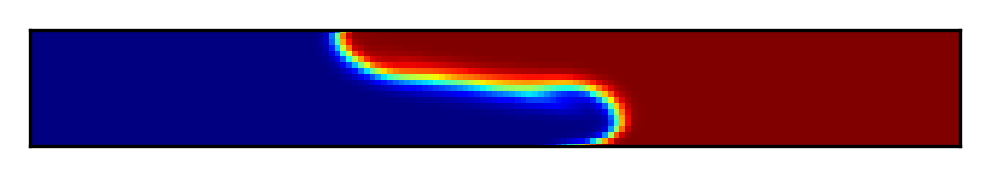

In [ ]:
print('Temperature_sample original deal with cylinder')
# 3data
[xmin, ymin] = np.min(coordinates, axis=0)
[xmax, ymax] = np.max(coordinates, axis=0)
# xmin, xmax = 1.5, 18.0
# ymin, ymax = -3.5, 3.5
limit = [xmax,xmin,ymax,ymin]
print(limit)
# value = velocity[1000,:,0]  # 原始data

grid_contour(X[200,:],coordinates,limit,'jet',None,30,0)

In [ ]:
X_avg = np.mean(X,axis=0)

Xrall = np.zeros((n_ts,num_point))
for i in range(0,n_ts):
  Xrall[i,:] = X[i,:]-X_avg
Xrall_sae = cp(Xrall)

# X_avg = np.mean(X,axis=0)
# for i in range(len(Xrall)):
#   Xrall[i,:,:] = X[i,:,:] - X_avg

In [ ]:
X0_sae = cp(Xrall_sae)

min = np.min(X0_sae,axis=0)
max = np.max(X0_sae,axis=0)
# X0_sae = (X0_sae-min)/(max-min)
X0_sae = X0_sae-min

# print(np.max(X0_sae[:,:,:,0]))
# print(np.max(X0_sae[:,:,:,1]))
# print(np.min(X0_sae[:,:,:,0]))
# print(np.min(X0_sae[:,:,:,1]))

m = 0
# for k in range(n_ts):
#   for i in range(Nx):
#     for j in range(Ny):
#       for u in range(2):
#         if np.isnan(X0_sae[k,i,j,u]):
#           X0_sae[k,i,j,u] = 0
#           m=m+1

print(np.max(X0_sae))
print(np.min(X0_sae))

print(X0_sae.shape)
print('nan:',m)

0.9999905905955008
0.0
(800, 1491)
nan: 0


In [ ]:
# np.save(os.path.join(store_path,"X0_sae_4layer.npy"),X0_sae)

In [ ]:
model_name = './Model/sae_1layer_800_relu'
input_dim = 128*64
layer_dim = [64*16,16*8,10*4,15,2]
latent_dim = 2
active = 'relu'

autoencoder_sae = build_autoencoder(input_dim, layer_dim, active)

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 1491)]            0         
                                                                 
 dense_30 (Dense)            (None, 700)               1044400   
                                                                 
 dense_31 (Dense)            (None, 100)               70100     
                                                                 
 dense_32 (Dense)            (None, 30)                3030      
                                                                 
 dense_33 (Dense)            (None, 5)                 155       
                                                                 
 dense_34 (Dense)            (None, 1)                 6         
                                                                 
 dense_35 (Dense)            (None, 5)                 10  

In [ ]:
X0_sae = X0_sae.reshape((n_ts,num_point))

In [ ]:
filename_ae='./Model/sae_1layer_800_relu' # File name of this model
train_network(autoencoder_sae, filename_ae, X0_sae)

Epoch 1/200
48/56 [========================>.....] - ETA: 0s - loss: 0.0949
Epoch 1: val_loss improved from inf to 0.07509, saving model to ./sae_1layer_800_relu.hdf5
56/56 [==============================] - 11s 15ms/step - loss: 0.0913 - val_loss: 0.0751
Epoch 2/200
56/56 [==============================] - ETA: 0s - loss: 0.0698
Epoch 2: val_loss improved from 0.07509 to 0.07464, saving model to ./sae_1layer_800_relu.hdf5
56/56 [==============================] - 1s 10ms/step - loss: 0.0698 - val_loss: 0.0746
Epoch 3/200
50/56 [=========================>....] - ETA: 0s - loss: 0.0707
Epoch 3: val_loss improved from 0.07464 to 0.07415, saving model to ./sae_1layer_800_relu.hdf5
56/56 [==============================] - 1s 11ms/step - loss: 0.0694 - val_loss: 0.0741
Epoch 4/200
50/56 [=========================>....] - ETA: 0s - loss: 0.0711
Epoch 4: val_loss did not improve from 0.07415
56/56 [==============================] - 0s 8ms/step - loss: 0.0691 - val_loss: 0.0746
Epoch 5/200
49/5

In [ ]:
autoencoder_sae = load_autoencoder(model_name, input_dim, latent_dim)

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 1491)]            0         
                                                                 
 dense_30 (Dense)            (None, 700)               1044400   
                                                                 
 dense_31 (Dense)            (None, 100)               70100     
                                                                 
 dense_32 (Dense)            (None, 30)                3030      
                                                                 
 dense_33 (Dense)            (None, 5)                 155       
                                                                 
 dense_34 (Dense)            (None, 1)                 6         
                                                                 
 dense_35 (Dense)            (None, 5)                 10  

In [ ]:
X0_sae = X0_sae.reshape((n_ts,num_point))
# encoder
r = encoder_sae.predict(X0_sae,verbose=1)
Xor=cp(r)
# decoder
decoded_data = decoder_sae.predict(r)
decoded_data = decoded_data.reshape((n_ts,num_point))

# relu
print(np.linalg.norm(decoded_data-X0_sae))
print(np.linalg.norm(X0_sae))

ratio = 1-np.linalg.norm(decoded_data-X0_sae)/np.linalg.norm(X0_sae)

reconstruct = np.zeros_like(decoded_data)

reconstruct = decoded_data + min
ratio = 1-np.linalg.norm(reconstruct-Xrall_sae)/np.linalg.norm(Xrall_sae)
print(ratio)

reconstruct = np.zeros_like(decoded_data)
reconstruct = decoded_data + min + X_avg
ratio = 1-np.linalg.norm(reconstruct-X)/np.linalg.norm(X)


np.save('./Model/r.npy',r)

#### RATE

In [ ]:
# le
pod_rate = 0.8608906820726624
sea_relu_rate = 0.9895622193649418
sea_tanh_rate =  0.9375051592546018
sae_sigmoid_rate = 0.9525952571540204
pod_sindy_rate = 0.8597016558736437
sae_sindy_rate = 0.969313268570502


In [ ]:
T = np.arange(400)
R1 = np.repeat(pod_rate,len(T))
R2 = np.repeat(sea_relu_rate,len(T))
R3 = np.repeat(sea_tanh_rate,len(T))
R4 = np.repeat(sae_sigmoid_rate,len(T))
R5 = np.repeat(pod_sindy_rate,len(T))
R6 = np.repeat(sae_sindy_rate,len(T))
R7 = np.repeat(1,len(T))

Text(0.5, 1.0, 'Rate')

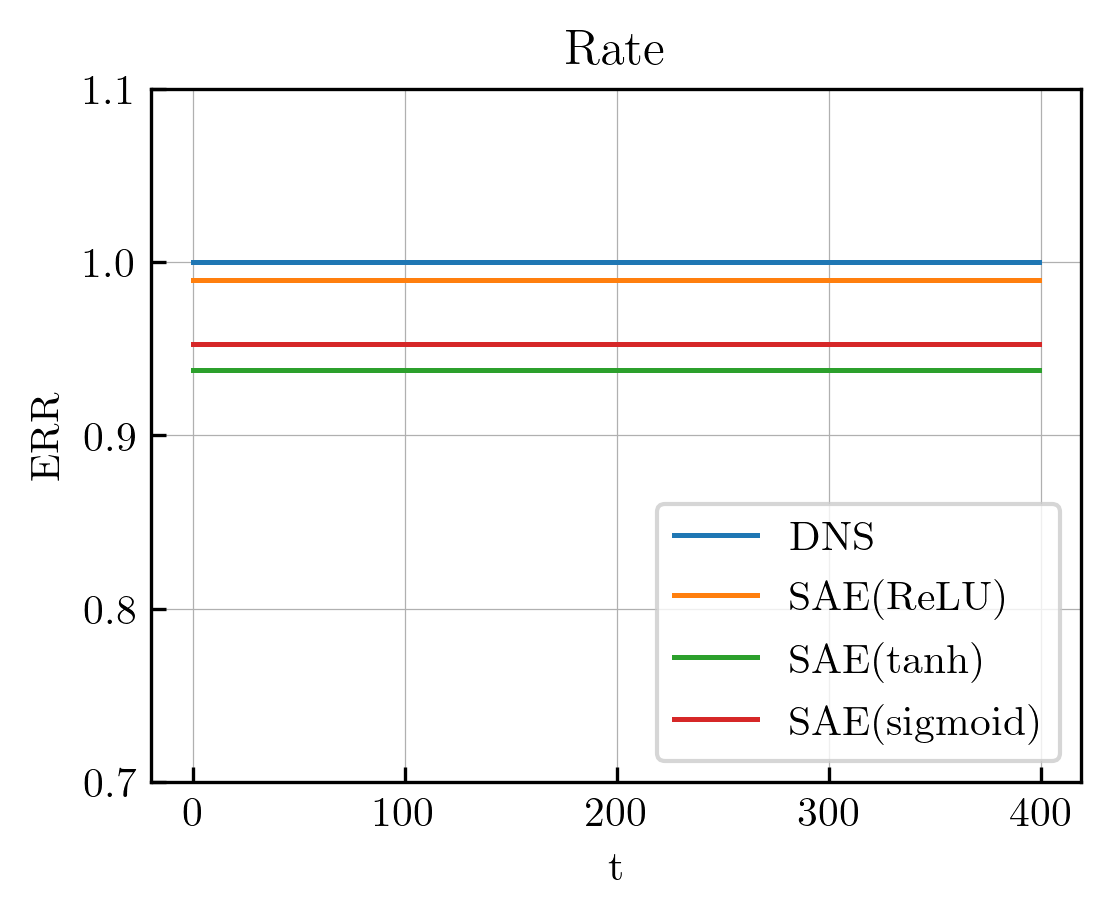

In [ ]:
plt.figure(dpi=300,figsize=(4,3))
# DNS=1
plt.plot(T,R7,'-',lw=1.2,label='DNS')
# plt.plot(T,R1,'-',lw=1.2,label='pod_rate')
plt.plot(T,R2,'-',lw=1.2,label='SAE(ReLU)')
plt.plot(T,R3,'-',lw=1.2,label='SAE(tanh)')
plt.plot(T,R4,'-',lw=1.2,label='SAE(sigmoid)')
# plt.plot(T,R5,'-',lw=1.2,label='pod_sindy_rate')
# plt.plot(T,R6,'-',lw=1.2,label='sae_sindy_rate')

plt.ylabel('ERR')
plt.xlabel('t') #,fontsize=8)

plt.yticks([0.7,0.8,0.9,1.0,1.1])

plt.legend(loc='lower right')

plt.grid(lw=0.3)

plt.title('Rate') #,fontsize=8)

Text(0.5, 1.0, 'Rate')

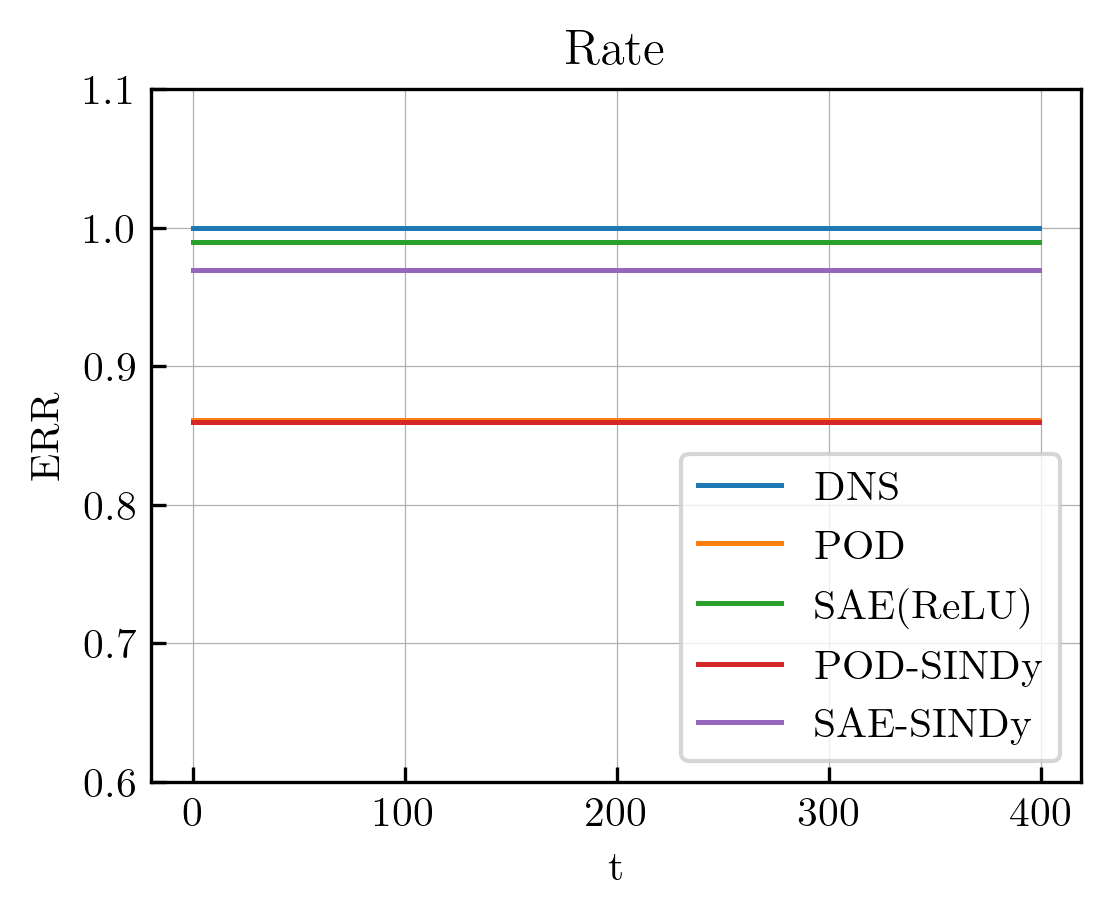

In [ ]:
plt.figure(dpi=300,figsize=(4,3))
# DNS=1
plt.plot(T,R7,'-',lw=1.2,label='DNS')
plt.plot(T,R1,'-',lw=1.2,label='POD')
plt.plot(T,R2,'-',lw=1.2,label='SAE(ReLU)')
# plt.plot(T,R3,'-',lw=1.2,label='SAE(tanh)')
# plt.plot(T,R4,'-',lw=1.2,label='SAE(sigmoid)')
plt.plot(T,R5,'-',lw=1.2,label=r'POD-SINDy')
plt.plot(T,R6,'-',lw=1.2,label='SAE-SINDy')

plt.ylabel('ERR')
plt.xlabel('t') #,fontsize=8)

plt.yticks([0.6,0.7,0.8,0.9,1.0,1.1],fontsize=10)

plt.legend(loc='lower right')

plt.grid(lw=0.3)

plt.title('Rate') #,fontsize=8)

Text(0.5, 1.0, 'Rate')

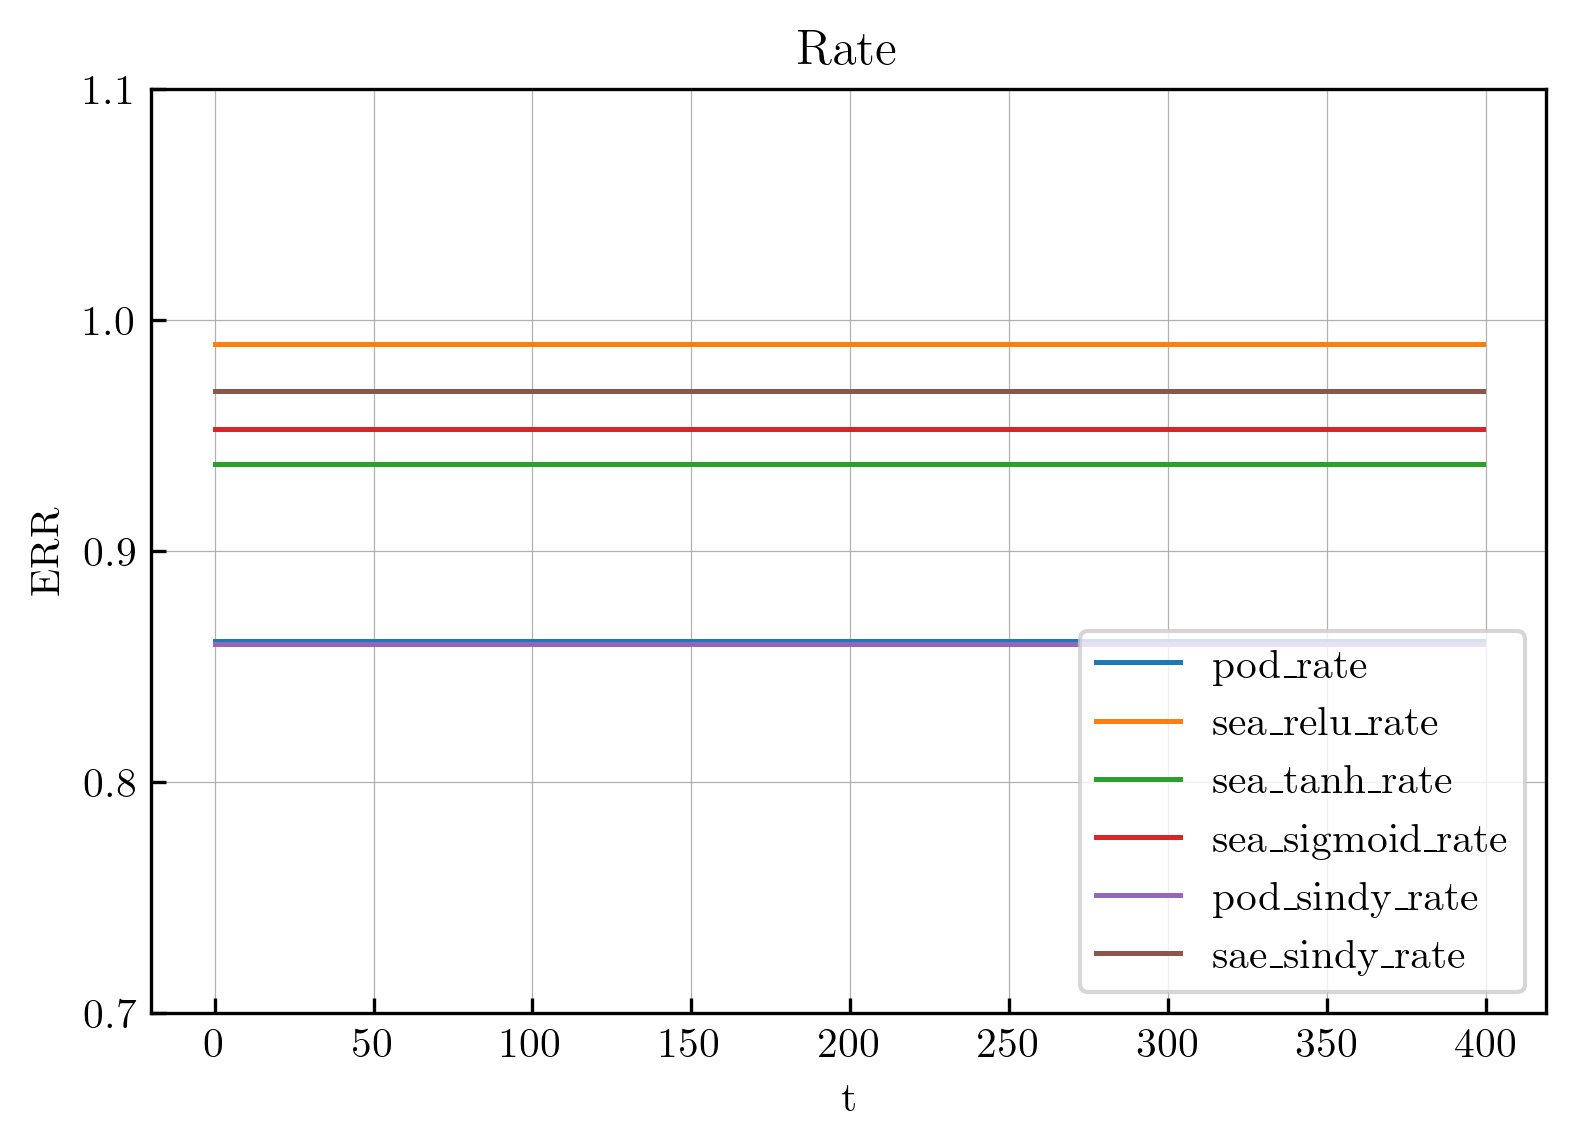

In [ ]:
plt.figure(dpi=300,figsize=(6,4))
# DNS=1
plt.plot(T,R1,'-',lw=1.2,label='pod_rate')
plt.plot(T,R2,'-',lw=1.2,label='sea_relu_rate')
plt.plot(T,R3,'-',lw=1.2,label='sea_tanh_rate')
plt.plot(T,R4,'-',lw=1.2,label='sea_sigmoid_rate')
plt.plot(T,R5,'-',lw=1.2,label='pod_sindy_rate')
plt.plot(T,R6,'-',lw=1.2,label='sae_sindy_rate')

plt.ylabel('ERR')
plt.xlabel('t') #,fontsize=8)

plt.yticks([0.7,0.8,0.9,1.0,1.1])

plt.legend(loc='lower right')

plt.grid(lw=0.3)

plt.title('Rate') #,fontsize=8)